In [1]:
import pandas as pd
import numpy as np
import folium as fl
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import GreatCircleDistance

In [2]:
data=pd.read_csv("bournemouth_venues.csv")
data.head()

,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,South Coast Roast,Coffee Shop,50.720913,-1.879085
1,DelMarco,Italian Restaurant,50.721370,-1.877221
2,Lower Gardens,Park,50.719323,-1.878195
3,Bournemouth Gardens,Park,50.718990,-1.877733
4,Bournemouth Square,Plaza,50.720156,-1.879563


In [3]:
data['Venue Category'].unique()

array(['Coffee Shop', 'Italian Restaurant', 'Park', 'Plaza',
       'Pizza Place', 'Burger Joint', 'Sandwich Place', 'Gym', 'Hotel',
       'Vegetarian / Vegan Restaurant', 'Comfort Food Restaurant',
       'Beach', 'Multiplex', 'Ice Cream Shop', 'Café', 'Greek Restaurant',
       'Gym / Fitness Center', 'Bubble Tea Shop',
       'Modern European Restaurant', 'Caribbean Restaurant',
       'Cocktail Bar', 'Thai Restaurant', 'Pub', 'Indian Restaurant',
       'Nightclub', 'Art Museum', 'Clothing Store', 'French Restaurant',
       'Theater', 'Bar', 'English Restaurant', 'Fast Food Restaurant',
       'Arts & Entertainment', 'Brewery', 'Garden', 'Aquarium', 'Diner',
       'Tapas Restaurant', 'Seafood Restaurant', 'Mexican Restaurant',
       'Dessert Shop', 'Other Great Outdoors', 'Chinese Restaurant',
       'Turkish Restaurant', 'Gay Bar', 'Noodle House', 'Grocery Store',
       'Scenic Lookout', 'Train Station', 'Bus Stop', 'Platform'],
      dtype=object)

In [4]:
data['Venue Category'].value_counts()

Hotel                            11
Coffee Shop                       7
Park                              5
Café                              4
Italian Restaurant                4
Sandwich Place                    4
Beach                             4
Fast Food Restaurant              3
Indian Restaurant                 3
Bar                               3
Gym / Fitness Center              2
Clothing Store                    2
French Restaurant                 2
Nightclub                         2
Pub                               2
Burger Joint                      2
English Restaurant                2
Mexican Restaurant                2
Gay Bar                           2
Pizza Place                       2
Plaza                             2
Grocery Store                     1
Gym                               1
Caribbean Restaurant              1
Vegetarian / Vegan Restaurant     1
Turkish Restaurant                1
Comfort Food Restaurant           1
Ice Cream Shop              

In [5]:
data.isnull().sum()

Venue Name         0
Venue Category     0
Venue Latitude     0
Venue Longitude    0
dtype: int64

In [6]:
data.describe()

,Venue Latitude,Venue Longitude
count,100.000000,100.000000
mean,50.720272,-1.878948
std,0.003434,0.008443
min,50.713341,-1.896096
25%,50.718884,-1.885080
50%,50.719901,-1.879594
75%,50.721050,-1.874754
max,50.731591,-1.858884


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Venue Name         100 non-null object
Venue Category     100 non-null object
Venue Latitude     100 non-null float64
Venue Longitude    100 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


In [8]:
data.rename(columns={'Venue Latitude':'latitude','Venue Longitude': 'longitude', 'Venue Category': 'category','Venue Name':'place'},inplace=True)

In [9]:
data.head()

,place,category,latitude,longitude
0,South Coast Roast,Coffee Shop,50.720913,-1.879085
1,DelMarco,Italian Restaurant,50.721370,-1.877221
2,Lower Gardens,Park,50.719323,-1.878195
3,Bournemouth Gardens,Park,50.718990,-1.877733
4,Bournemouth Square,Plaza,50.720156,-1.879563


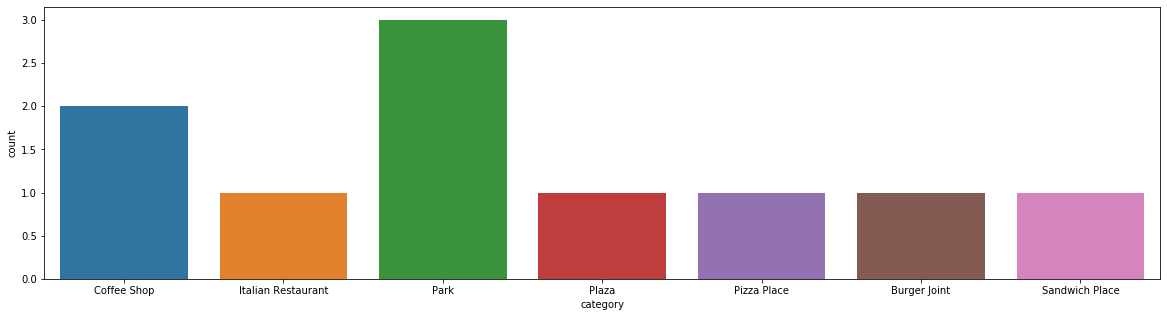

In [10]:
fig = plt.figure(figsize = (20,5))
sns.countplot(data['category'][0:10])

In [11]:
# Folium map
map = fl.Map([50.720913,-1.879085],zoom_start = 15)

# grouping dataframe by category
data = data.groupby("category")
map

In [12]:
hotels=data.get_group('Hotel')
print(hotels.head())

                            place category   latitude  longitude
13             Hilton Bournemouth    Hotel  50.718931  -1.880605
40                The Green House    Hotel  50.719407  -1.868267
41              The Norfolk Hotel    Hotel  50.721509  -1.878929
45  Hampton by Hilton Bournemouth    Hotel  50.718971  -1.881915
74                 Hallmark Hotel    Hotel  50.718742  -1.890372


In [13]:
# Separating the hotel locations and converting each attribute into list
lat = list(hotels["latitude"])
lon = list(hotels["longitude"])
place = list(hotels["place"])
cat = list(hotels["category"])

In [14]:
# visualize / locate hotels--->Markers in red
for lt,ln,pl,cat in zip(lat,lon,place,cat):
    fl.Marker(location = [lt,ln], tooltip = str(pl) +","+str(cat), icon = fl.Icon(color = 'blue')).add_to(map)
map 

In [15]:
parks = data.get_group('Park')

# Separating the all park locations and converting each attribute into list
lat = list(parks["latitude"])
lon = list(parks["longitude"])
place = list(parks["place"])
cat = list(parks["category"])
print(parks)

# parks in green colors
for cat,lt,ln,pl in zip(cat,lat,lon,place):
    fl.Marker(location = [lt,ln], tooltip = str(pl) +","+str(cat), icon = fl.Icon(color = 'green')).add_to(map)
map

                  place category   latitude  longitude
2         Lower Gardens     Park  50.719323  -1.878195
3   Bournemouth Gardens     Park  50.718990  -1.877733
8       Central Gardens     Park  50.719675  -1.879184
27         Meyrick Park     Park  50.728062  -1.881856
72        Upper Gardens     Park  50.727025  -1.896096


In [16]:
beach = data.get_group('Beach')
lat_beach = list(beach["latitude"])
lon_beach = list(beach["longitude"])
place = list(beach["place"])
cat = list(beach["category"])
print(beach)

# Beach in blue color
for cat,lt,ln,pl in zip(cat,lat_beach,lon_beach,place):
    fl.Marker(location = [lt,ln], tooltip = str(pl) +","+str(cat), icon = fl.Icon(color = 'blue')).add_to(map)
map

                                   place category   latitude  longitude
18                     Bournemouth Beach    Beach  50.716387  -1.874734
23  Bournemouth Beach (East Cliff Slope)    Beach  50.716874  -1.874283
61                          Durley Chine    Beach  50.713380  -1.889022
98                          Middle Chine    Beach  50.715090  -1.895664


In [17]:

'''
Calculating distance between two locations using Geopy
My goal is to find the nearest beach from my current location
(My location == Hallmark Hotel), I'm going to use the GreatCircleDistance 
to calculate the distance between two locations. Destination points/locations 
are all the beaches in Bournemouth, and the source location is Hallmark Hotel((50.718742,-1.890372))).
For more information about GreatCircledistance click here. I'm going to use PolyLine 
function of the folium module to draw a line between points, Line with color green indicates 
the nearest distance to the destination(beach) from the source(Hotel - hallmark).
Note : Distance is calculated in kilometers not miles
'''


"\nCalculating distance between two locations using Geopy\nMy goal is to find the nearest beach from my current location\n(My location == Hallmark Hotel), I'm going to use the GreatCircleDistance \nto calculate the distance between two locations. Destination points/locations \nare all the beaches in Bournemouth, and the source location is Hallmark Hotel((50.718742,-1.890372))).\nFor more information about GreatCircledistance click here. I'm going to use PolyLine \nfunction of the folium module to draw a line between points, Line with color green indicates \nthe nearest distance to the destination(beach) from the source(Hotel - hallmark).\nNote : Distance is calculated in kilometers not miles\n"

In [18]:
# latitude and longitude of Hallmark Hotel
Source = (50.718742,-1.890372)

# Empty list to store the distance
distance = []
for lt,ln in zip(lat_beach,lon_beach):
    dist = GreatCircleDistance(Source,(lt,ln))
    distance.append(dist)
min_dist = min(distance)
# Draw lines between points
for dist,lt,ln in zip(distance,lat_beach,lon_beach):
    if (dist == min_dist): 
        fl.PolyLine([Source,(lt,ln),],color = "green", weight = 4).add_to(map)
map